In [39]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
from scipy import stats


In [18]:
import warnings
warnings.simplefilter('ignore')

In [19]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)


In [20]:
ds = pd.read_csv("..\\data\\Life_Expectancy_Data.csv",sep=",")

In [21]:
print('columns count - ',len(ds.columns), '\n')
print('columns: ',list(ds.columns))

columns count -  22 

columns:  ['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']


In [22]:
ds.shape


(2938, 22)

In [23]:
ds.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

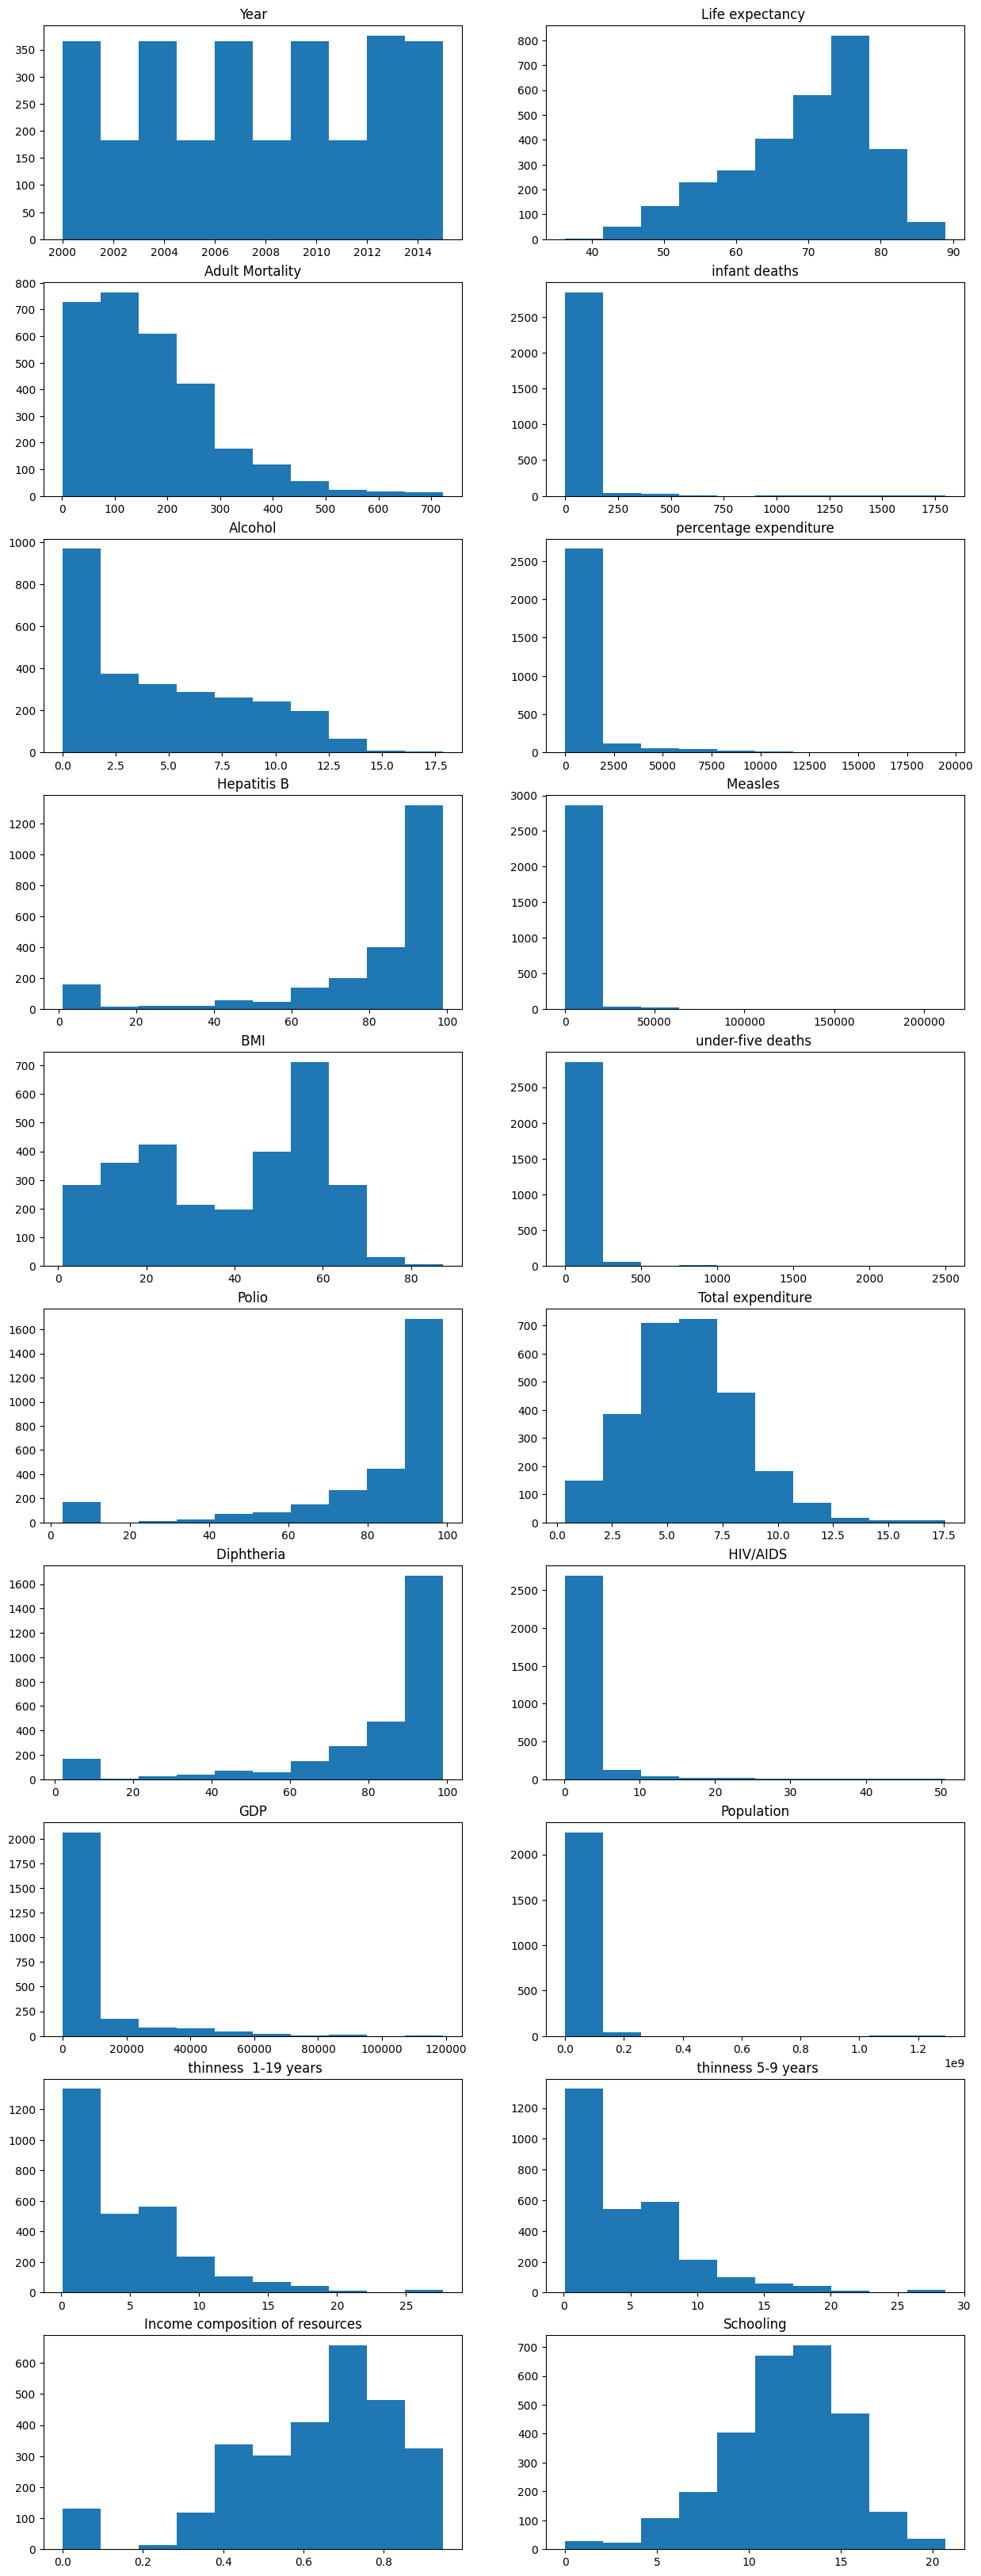

In [24]:
num_cols = ds.select_dtypes(exclude= 'O').columns

plt.figure(figsize=(15,75))

for i in range(len(num_cols)):
    plt.subplot(18,2,i+1)
    plt.hist(ds[num_cols[i]])
    plt.title(num_cols[i])

plt.show()#значення відносно кількості записів

<Axes: >

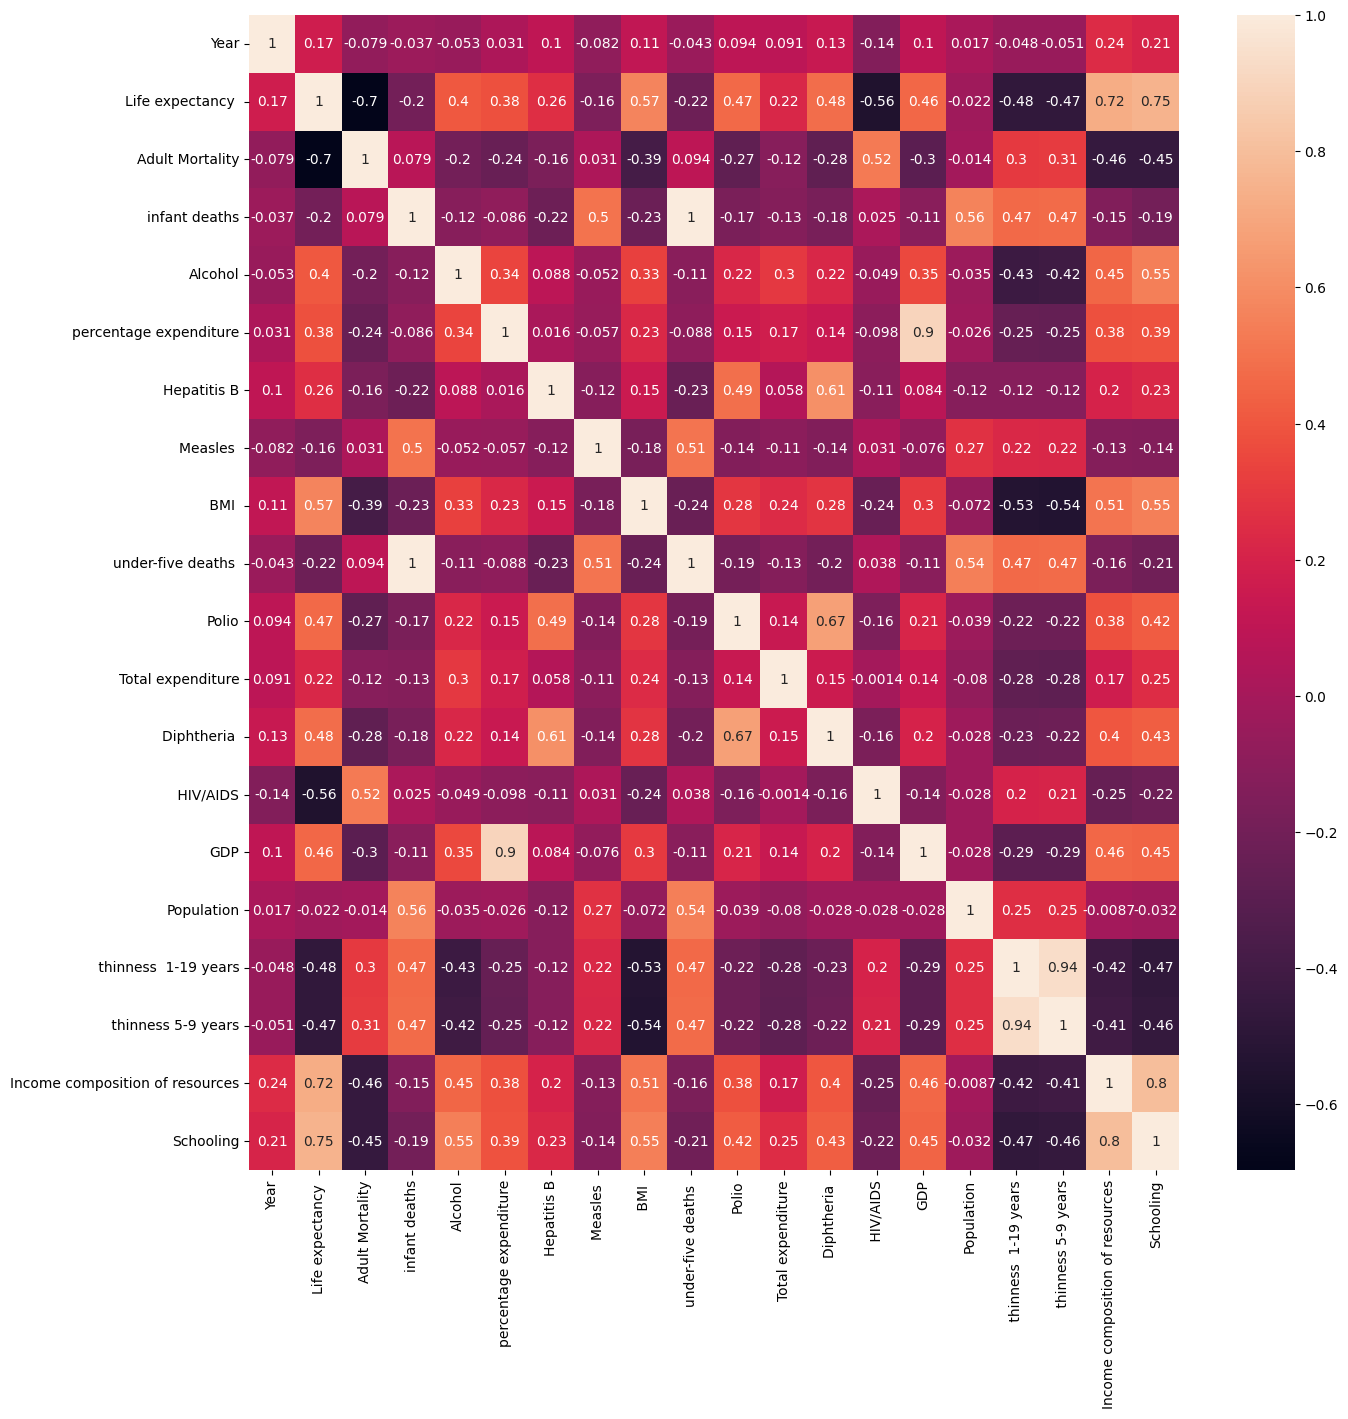

In [50]:
plt.figure(figsize=(15,15))

sns.heatmap(ds[num_cols].corr() , annot=True)

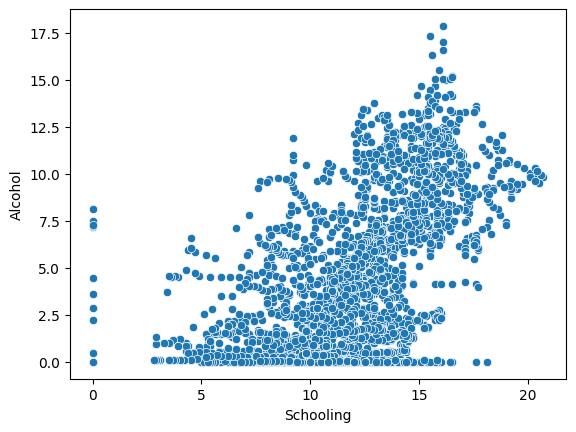

In [26]:
sns.scatterplot(x=ds['Schooling'],y=ds['Alcohol']);

In [27]:
ds.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


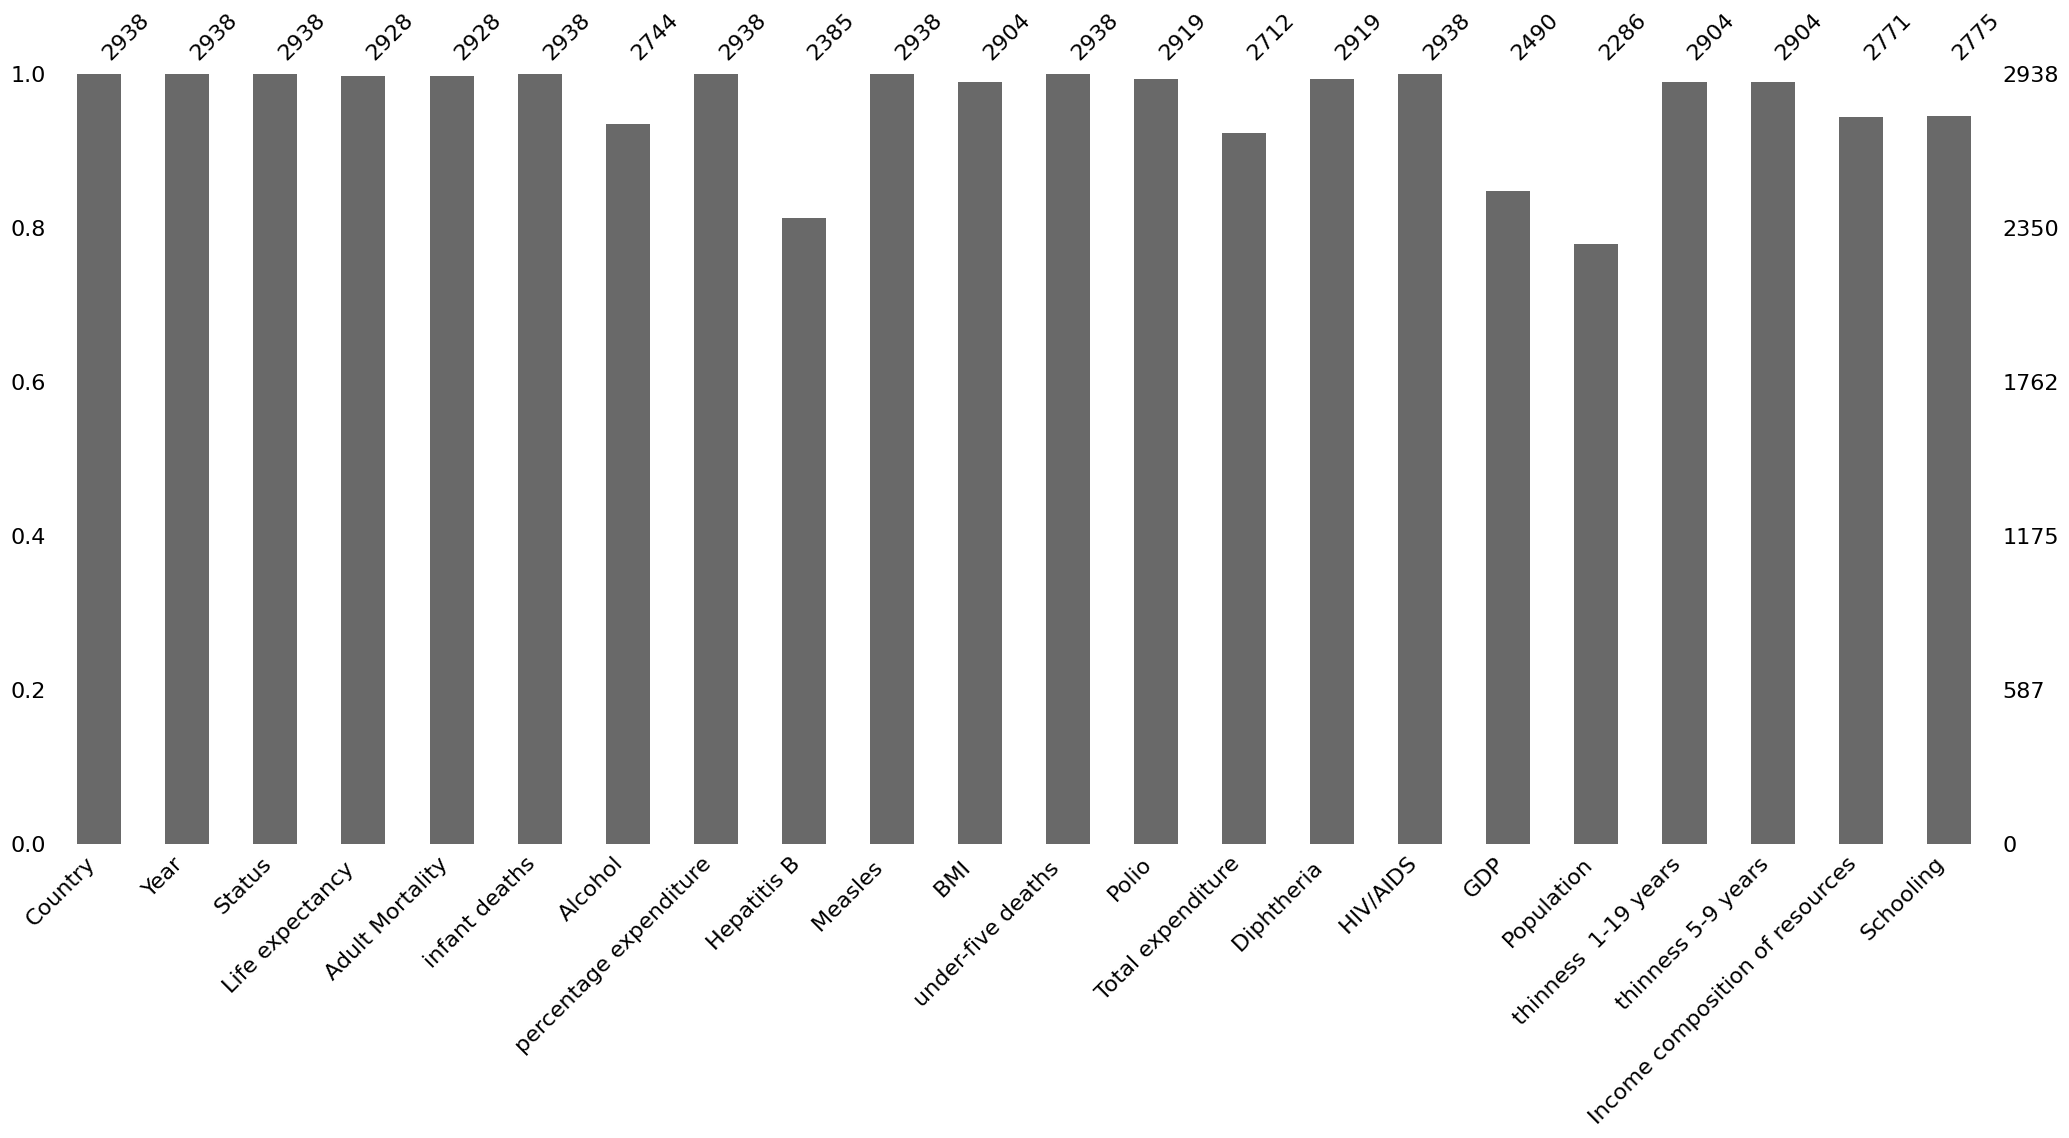

In [28]:
# Create the missingno barplot to get percents of nonmissing data
msno.bar(ds)

# Show the plot
plt.show()

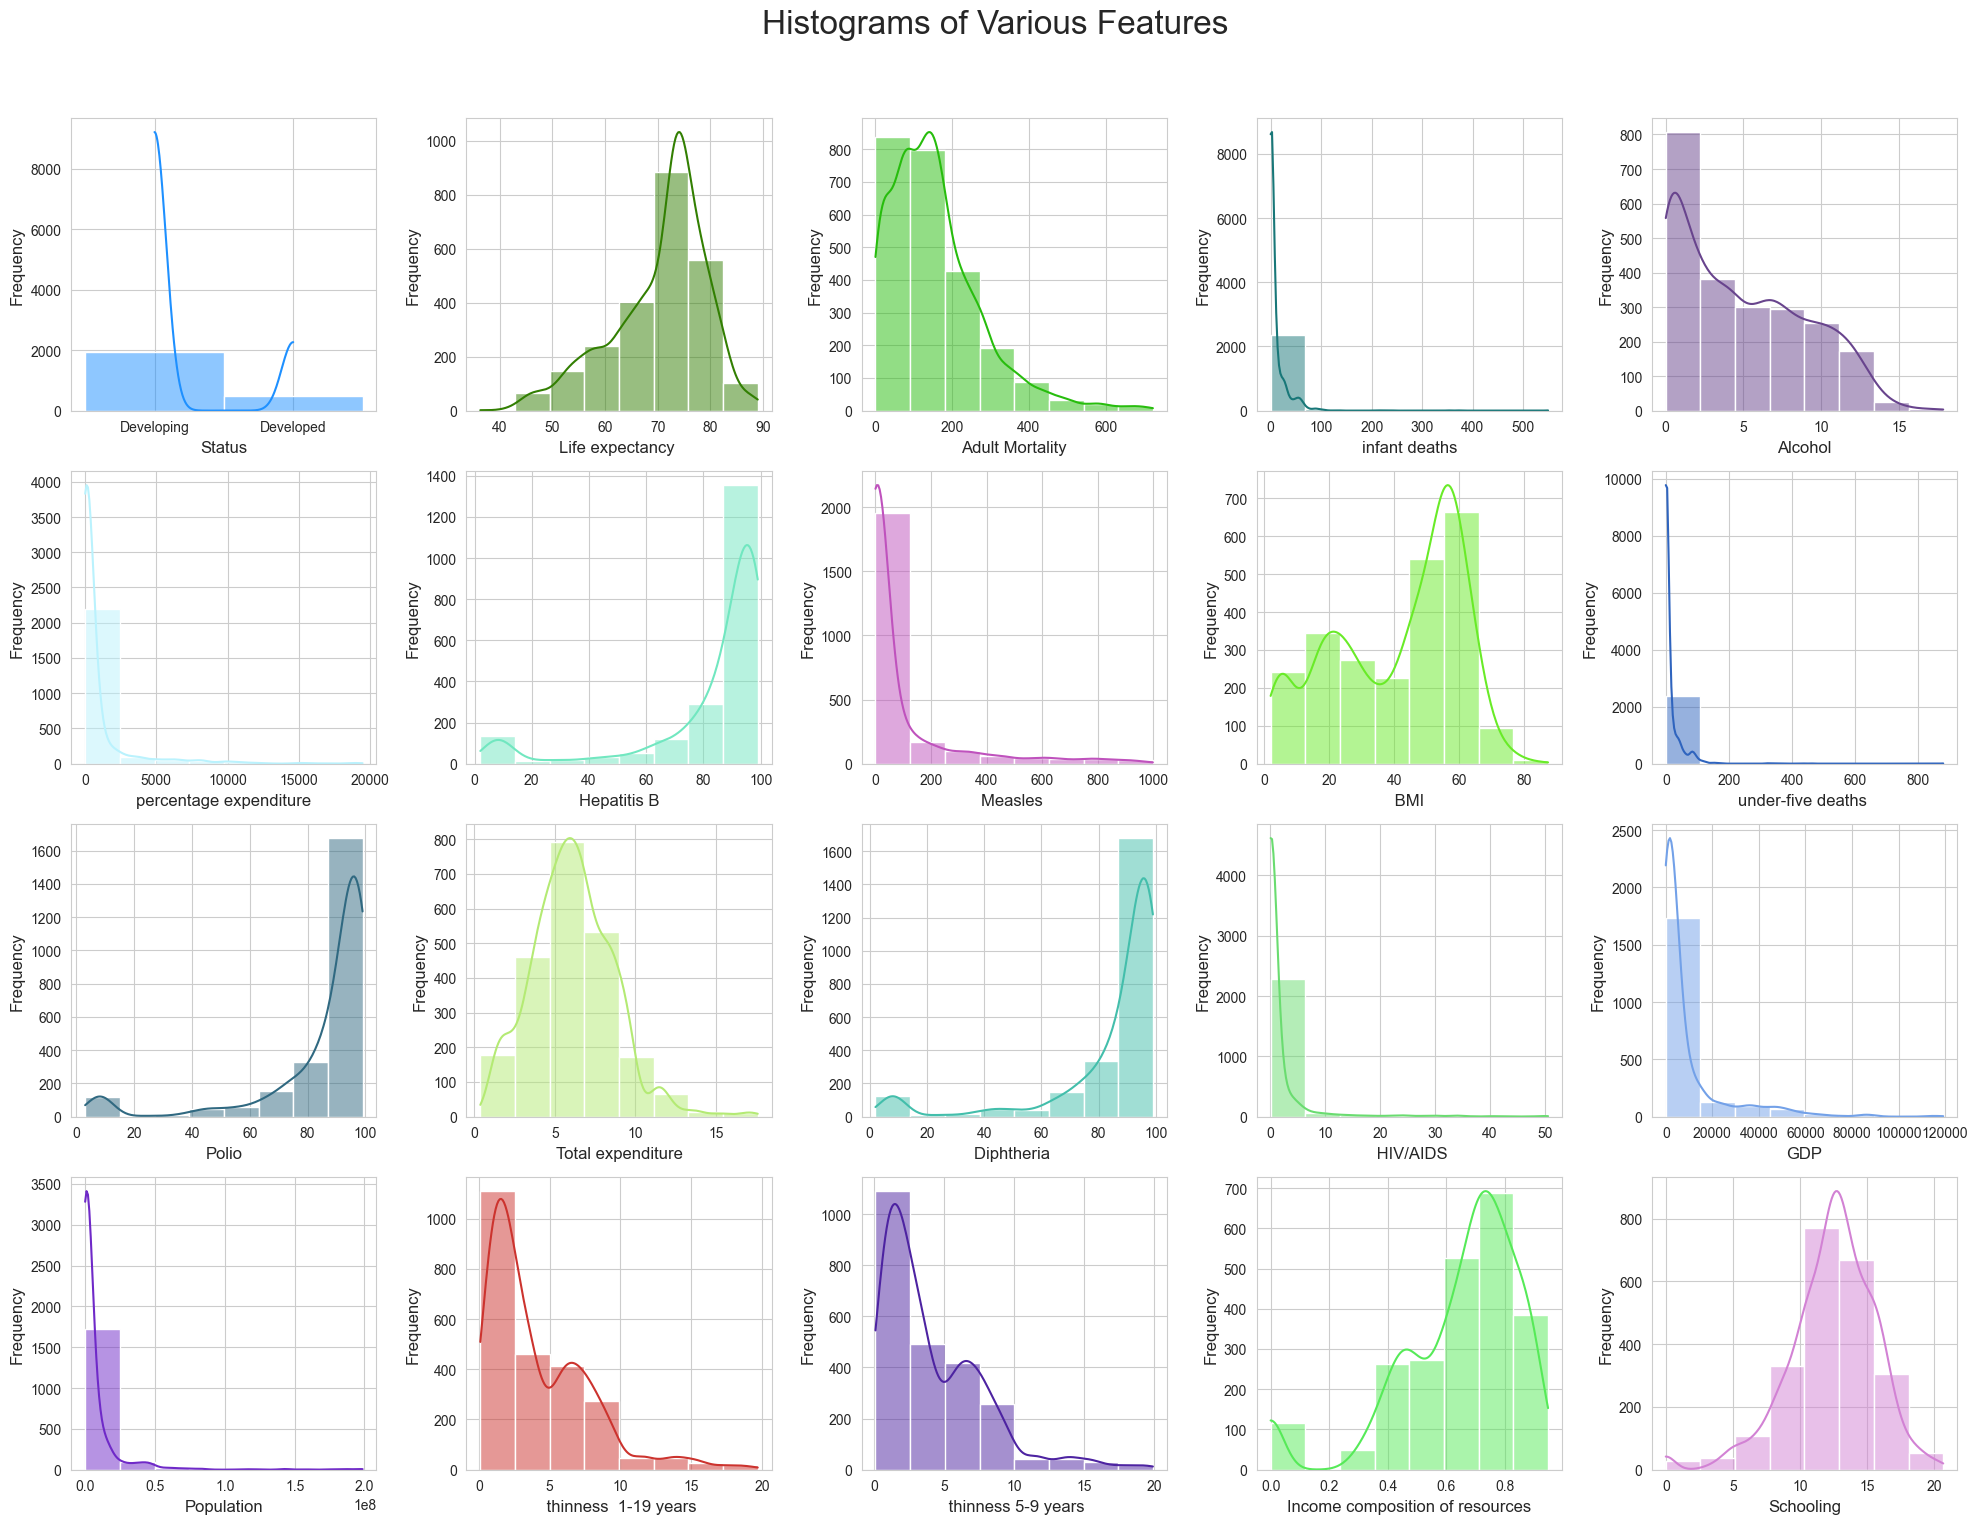

In [85]:
ds = ds[ds['infant deaths'] <= 1000]#drop anomalies 
ds = ds[ds['under-five deaths '] <= 1000]#drop anomalies 
ds = ds[ds['Measles '] <= 1000]#drop anomalies 
ds = ds[ds['under-five deaths '] <= 1000]#drop anomalies 

import matplotlib.pyplot as plt
import seaborn as sns
from random import randint

selected_cols = [col for col in ds.columns if col not in ['Country','Year']]

colors = ['dodgerblue']
for i in range(len(selected_cols)):
    colors.append('#%03X' % randint(0, 0xFFFFFF))

num_subplots = len(selected_cols)
num_rows = (num_subplots - 1) // 5 + 1
num_cols = min(5, num_subplots)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 4), facecolor='white')
fig.suptitle("Histograms of Various Features", size=24)

for i in range(num_rows):
    for j in range(num_cols):
        idx = i * num_cols + j
        if idx < num_subplots:
            sns.histplot(ds[selected_cols[idx]], ax=axes[i, j], color=colors[idx], kde=True, bins=8)
            axes[i, j].set_xlabel(selected_cols[idx], fontsize=12)  # Set x-axis label font size
            axes[i, j].set_ylabel("Frequency", fontsize=12)  # Set y-axis label font size

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

<Axes: xlabel='Schooling', ylabel='Life expectancy '>

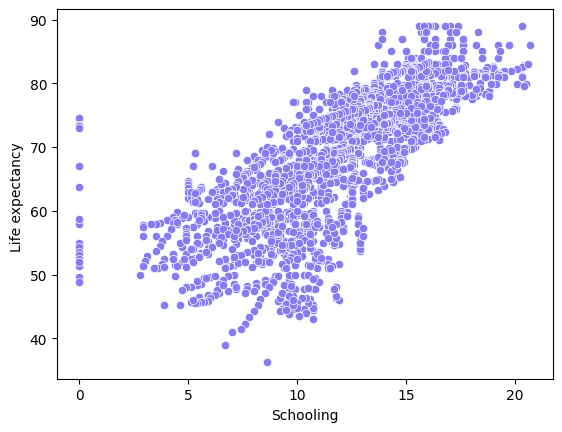

In [36]:
sns.scatterplot(data = ds, x = 'Schooling', y = 'Life expectancy ', color= '#857cf4')

<Figure size 500x500 with 0 Axes>

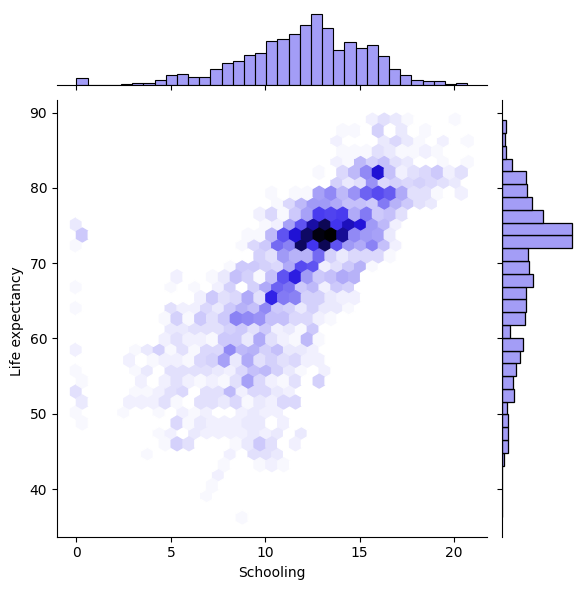

In [48]:
# Schooling vs Life expectancy
plt.figure(figsize=(5,5))
sns.jointplot(x=ds["Schooling"], y=ds["Life expectancy "], kind="hex", color="#857cf4")
plt.show()

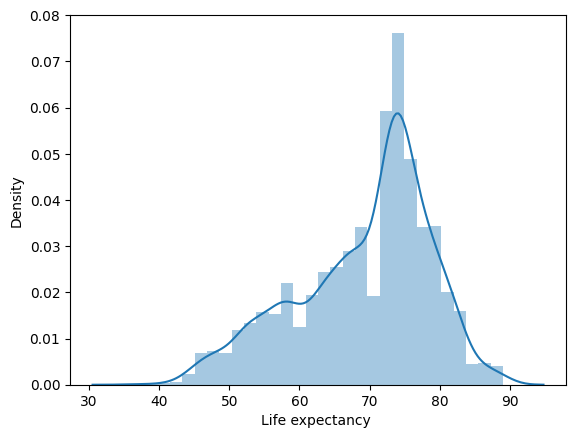

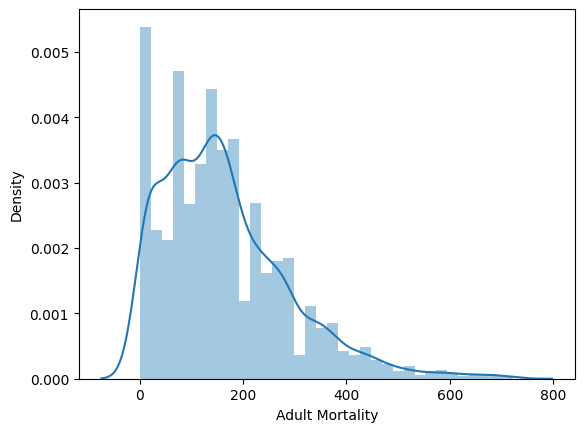

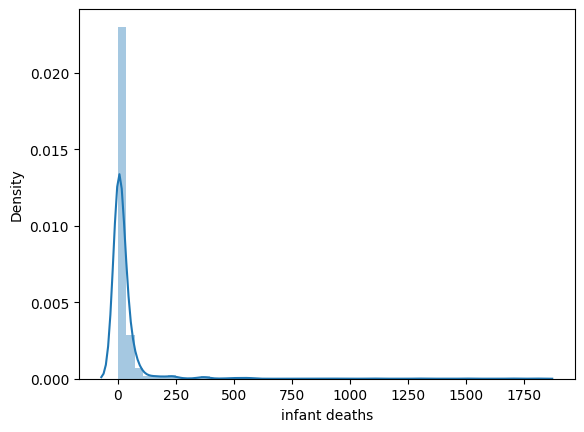

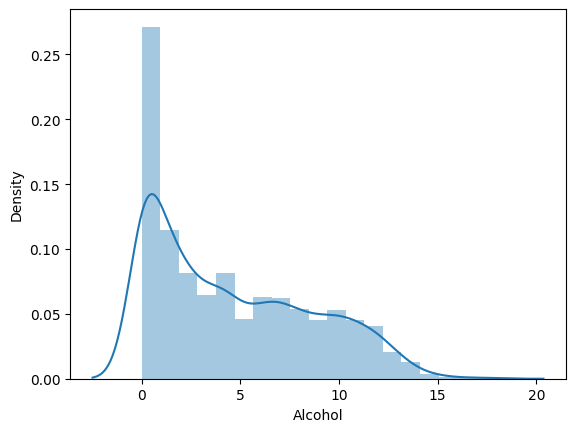

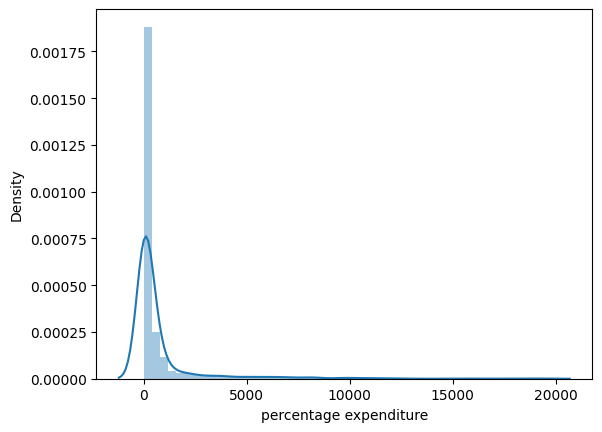

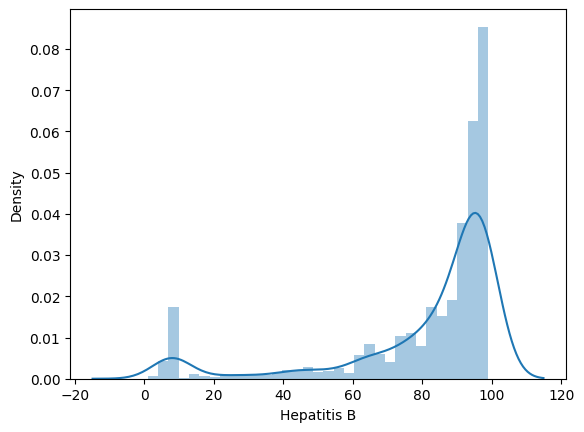

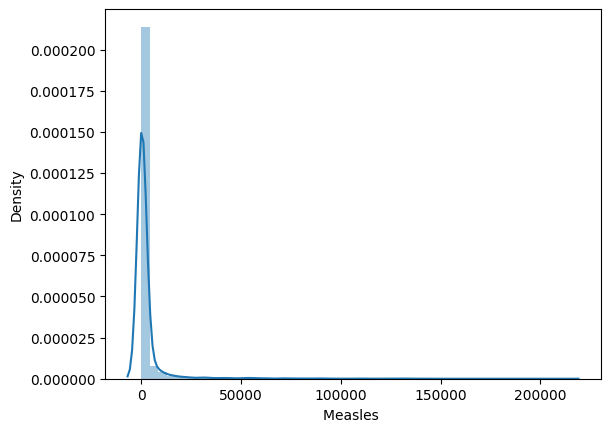

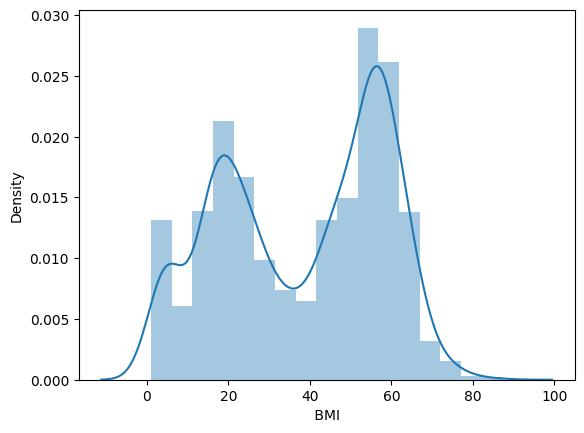

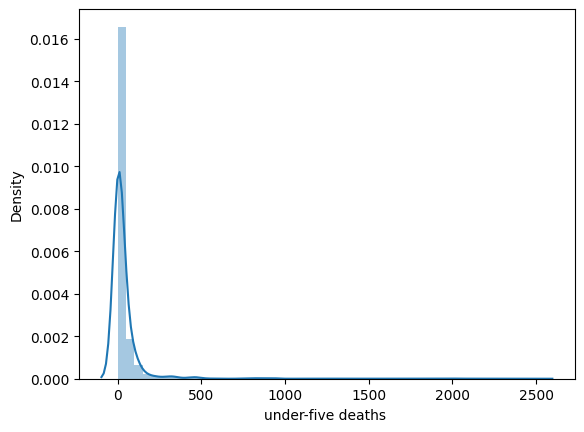

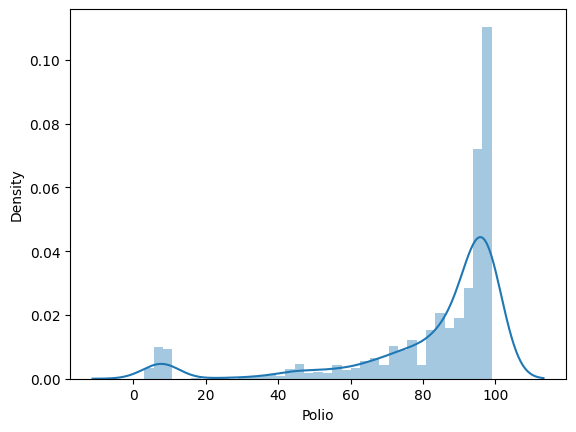

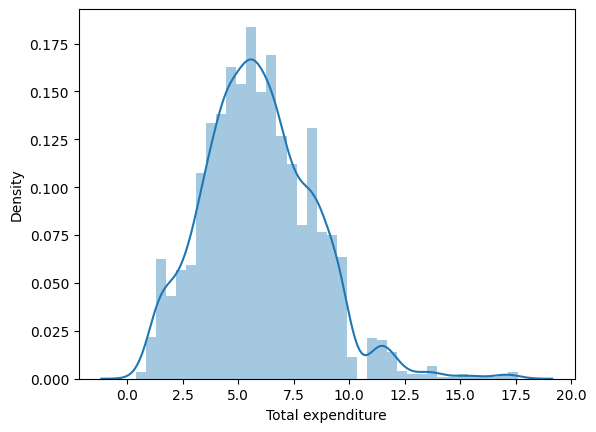

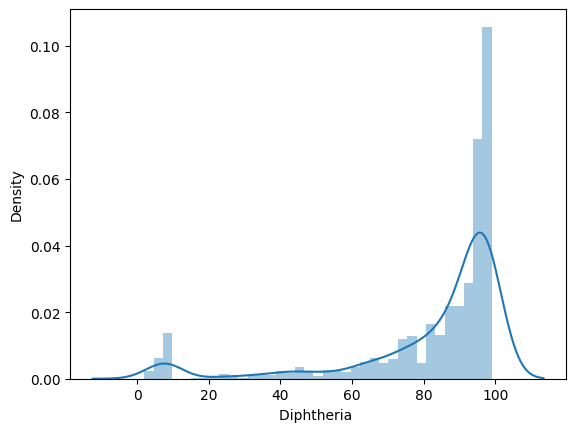

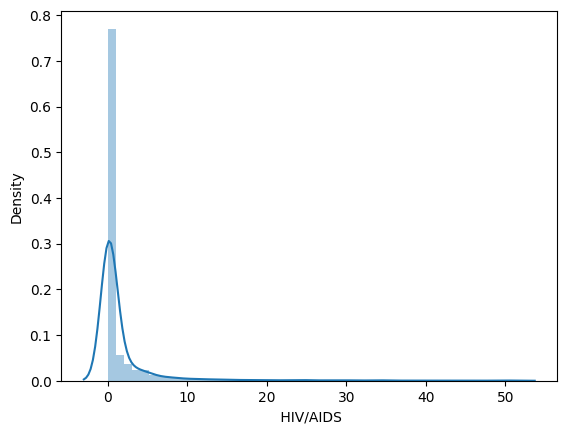

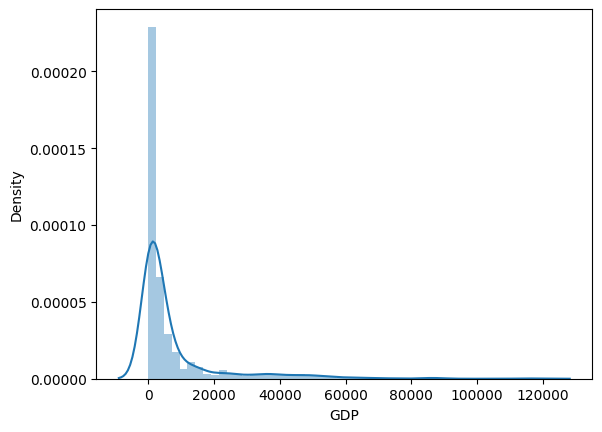

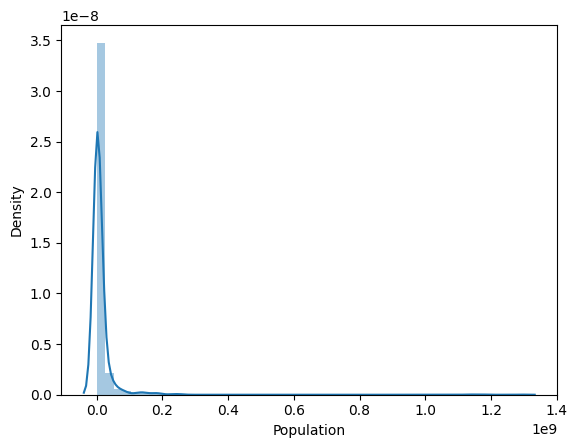

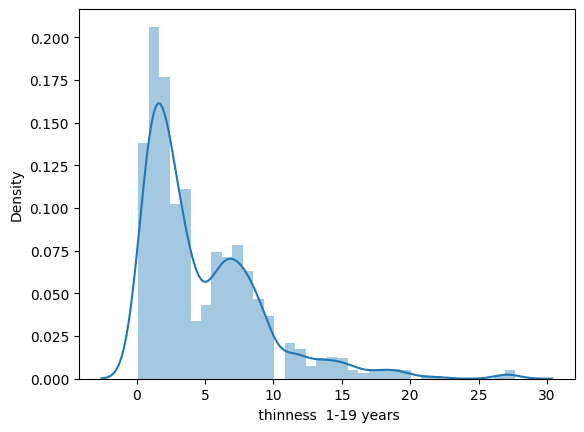

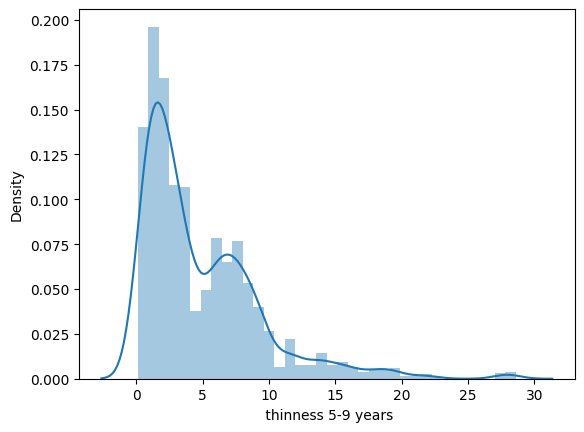

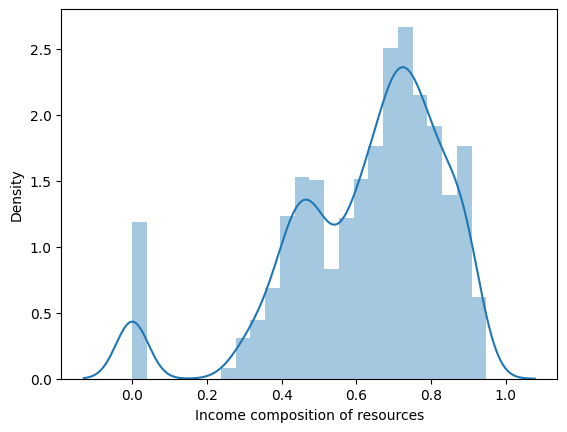

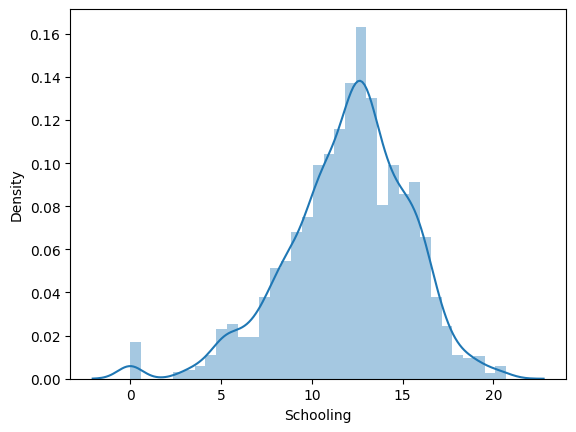

In [49]:
#drop the columns like country, year and status 
d=ds.iloc[:,3:]
for i in d.columns:
    plt.figure()
    sns.distplot(ds[i])

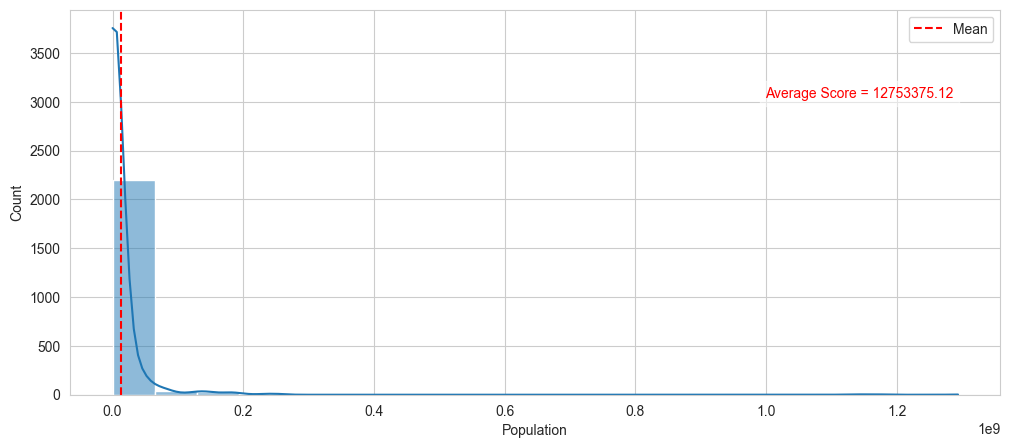

In [76]:
sns.set_style("whitegrid")
# Set the size of the plot
plt.figure(figsize=(12, 5))
# Plot the distribution of the 'Life expectancy' column
plotd = sns.histplot(ds['Population'], kde=True, bins=20)

# Plot the mean line
mean_line = plt.axvline(ds['Population'].mean(), c='red', linestyle='dashed', label='Mean')
# Add text annotation for the mean
plt.text(0.95, 0.8, f'Average Score = {ds["Population"].mean():.2f}', transform=plt.gca().transAxes, color='red', fontsize=10,
         verticalalignment='top', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.5))
# Add legend
plt.legend()
# Display the plot
plt.show()

<Axes: ylabel='count'>

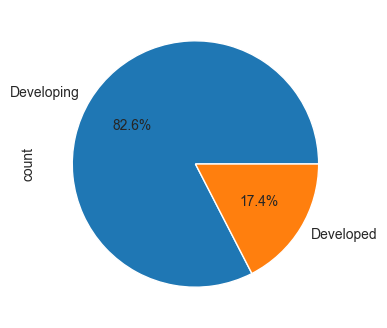

In [68]:
ds['Status'].value_counts().plot.pie(autopct='%1.1f%%')

In [71]:
ds[' BMI '].describe()

count    2904.000000
mean       38.321247
std        20.044034
min         1.000000
25%        19.300000
50%        43.500000
75%        56.200000
max        87.300000
Name:  BMI , dtype: float64

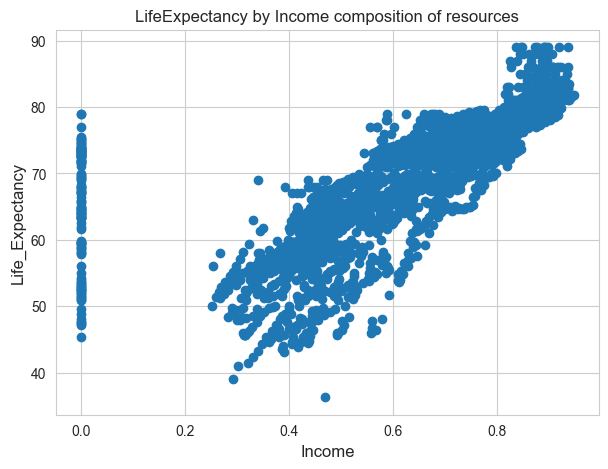

In [75]:
plt.figure(figsize=(7,5))
plt.title("LifeExpectancy by Income composition of resources")
plt.xlabel("Income",fontsize=12)
plt.ylabel("Life_Expectancy",fontsize=12)
plt.scatter(ds["Income composition of resources"], ds["Life expectancy "])